In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.shape, df2.shape

((7381, 8), (868, 8))

In [4]:
df1.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [5]:
df2.isna().sum()

Place          0
ProductId      0
ProductName    0
UmId           0
UmName         0
Month          0
Year           0
Price          0
dtype: int64

In [6]:
df = pd.concat([df1, df2], axis=0)

In [7]:
df.shape

(8249, 8)

In [8]:
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
863,Izmir,502,Cocoa (powder) - Retail,5,KG,1,2021,68.2002
864,Izmir,502,Cocoa (powder) - Retail,5,KG,2,2021,68.6250
865,Izmir,502,Cocoa (powder) - Retail,5,KG,3,2021,71.2310
866,Izmir,502,Cocoa (powder) - Retail,5,KG,4,2021,73.2609


In [9]:
df.columns

Index(['Place', 'ProductId', 'ProductName', 'UmId', 'UmName', 'Month', 'Year',
       'Price'],
      dtype='object')

In [10]:
df.drop(['ProductId', 'UmId'], axis=1, inplace=True)

In [11]:
df.head()

,Place,ProductName,UmName,Month,Year,Price
0,National Average,Rice - Retail,KG,5,2013,4.4920
1,National Average,Rice - Retail,KG,6,2013,4.5786
2,National Average,Rice - Retail,KG,11,2013,4.7865
3,National Average,Rice - Retail,KG,12,2013,5.1337
4,National Average,Rice - Retail,KG,1,2014,5.5099


In [12]:
df['ProductName'].value_counts()

Groundnuts (shelled) - Retail                             194
Meat (chicken) - Retail                                   194
Tomatoes - Retail                                         194
Oil (sunflower) - Retail                                  194
Fish (fresh) - Retail                                     194
Coffee - Retail                                           194
Lentils - Retail                                          194
Bananas - Retail                                          194
Meat (mutton) - Retail                                    194
Pasta - Retail                                            194
Tea - Retail                                              194
Meat (veal) - Retail                                      194
Beans (white) - Retail                                    194
Eggs - Retail                                             194
Oil (olive) - Retail                                      194
Wheat flour - Retail                                      194
Salt - R

In [13]:
cols_to_replace = df['ProductName'].value_counts()[df['ProductName'].value_counts() < 50].keys()

In [14]:
df['ProductName'].replace(cols_to_replace,['Others' for i in range(6)],inplace=True)

In [15]:
df['ProductName'].value_counts()['Others']

177

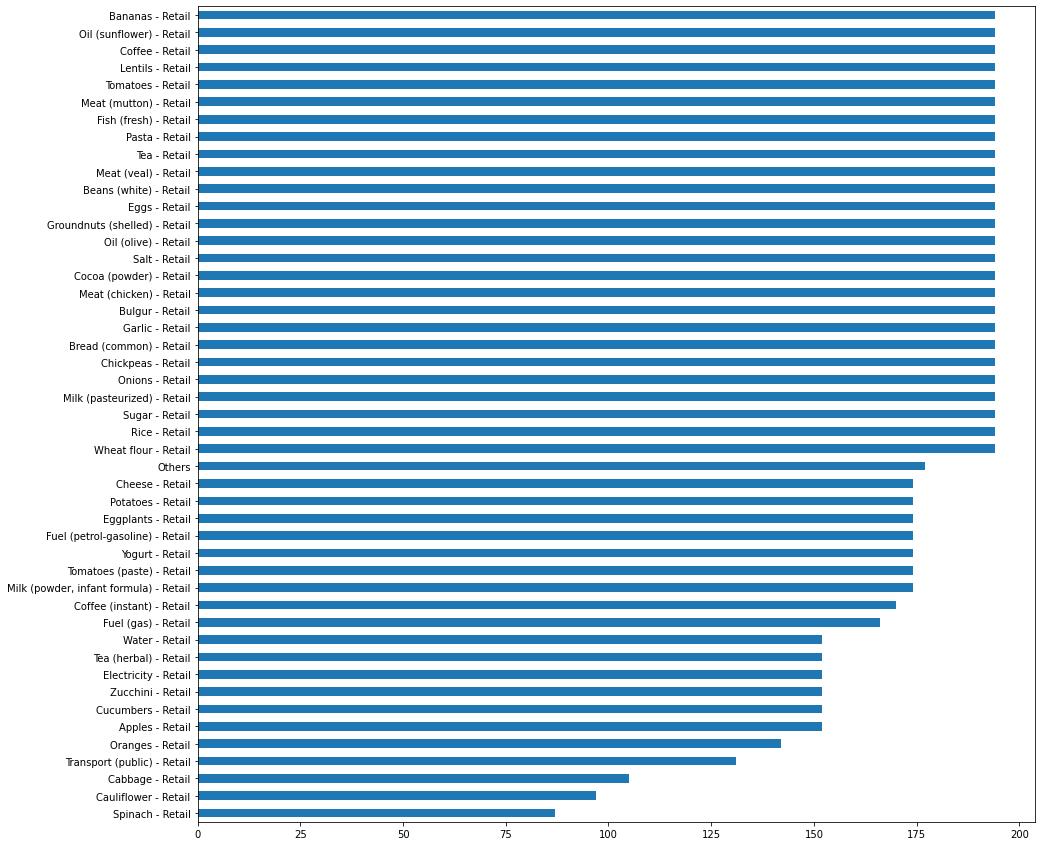

In [16]:
plt.figure(figsize=(15,15))
df['ProductName'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [17]:
df.dtypes

Place           object
ProductName     object
UmName          object
Month            int64
Year             int64
Price          float64
dtype: object

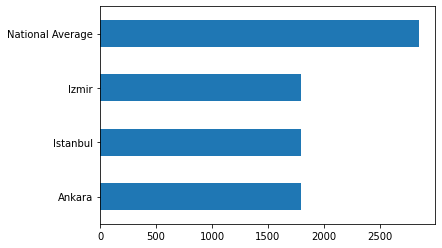

In [18]:
df.Place.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()


In [19]:
df.UmName.value_counts()

KG             6312
L               756
Unit            406
12 KG           166
Package         152
kWh             152
Cubic meter     152
Course          131
Day              22
Name: UmName, dtype: int64

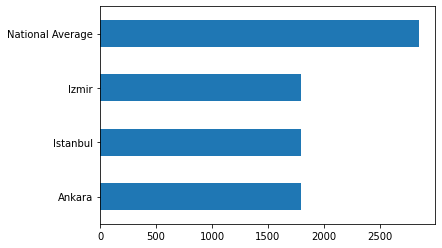

In [20]:
df['Place'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [21]:
df_dummies = pd.get_dummies(df[['Place', 'ProductName', 'UmName']],drop_first=True)

In [22]:
df_dummies.columns

Index(['Place_Istanbul', 'Place_Izmir', 'Place_National Average',
       'ProductName_Bananas - Retail', 'ProductName_Beans (white) - Retail',
       'ProductName_Bread (common) - Retail', 'ProductName_Bulgur - Retail',
       'ProductName_Cabbage - Retail', 'ProductName_Cauliflower - Retail',
       'ProductName_Cheese - Retail', 'ProductName_Chickpeas - Retail',
       'ProductName_Cocoa (powder) - Retail',
       'ProductName_Coffee (instant) - Retail', 'ProductName_Coffee - Retail',
       'ProductName_Cucumbers - Retail', 'ProductName_Eggplants - Retail',
       'ProductName_Eggs - Retail', 'ProductName_Electricity - Retail',
       'ProductName_Fish (fresh) - Retail', 'ProductName_Fuel (gas) - Retail',
       'ProductName_Fuel (petrol-gasoline) - Retail',
       'ProductName_Garlic - Retail',
       'ProductName_Groundnuts (shelled) - Retail',
       'ProductName_Lentils - Retail', 'ProductName_Meat (chicken) - Retail',
       'ProductName_Meat (mutton) - Retail',
       'Product

In [23]:
df['Year'] = df['Year']/10000
df['Month'] = df['Month']/100


In [24]:
df.head()

,Place,ProductName,UmName,Month,Year,Price
0,National Average,Rice - Retail,KG,0.05,0.2013,4.4920
1,National Average,Rice - Retail,KG,0.06,0.2013,4.5786
2,National Average,Rice - Retail,KG,0.11,0.2013,4.7865
3,National Average,Rice - Retail,KG,0.12,0.2013,5.1337
4,National Average,Rice - Retail,KG,0.01,0.2014,5.5099


In [25]:
df_main = pd.concat([df_dummies, df[['Month', 'Year', 'Price']]], axis=1)

In [26]:
df_main.shape

(8249, 60)

In [27]:
df_main.head()

,Place_Istanbul,Place_Izmir,Place_National Average,ProductName_Bananas - Retail,ProductName_Beans (white) - Retail,ProductName_Bread (common) - Retail,ProductName_Bulgur - Retail,ProductName_Cabbage - Retail,ProductName_Cauliflower - Retail,ProductName_Cheese - Retail,...,UmName_Cubic meter,UmName_Day,UmName_KG,UmName_L,UmName_Package,UmName_Unit,UmName_kWh,Month,Year,Price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.05,0.2013,4.4920
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.06,0.2013,4.5786
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.11,0.2013,4.7865
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.12,0.2013,5.1337
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.01,0.2014,5.5099


In [28]:
x, y = df_main.drop(['Price'],axis=1), df_main['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
x_train.shape, x_test.shape

((6186, 59), (2063, 59))

In [30]:
y_train.shape, y_test.shape

((6186,), (2063,))

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [33]:
model.score(x_test, y_test)

0.9291787220787456

In [34]:
model.score(x_train, y_train)

0.9065259108171584

In [35]:
mean_squared_error(y_test, y_pred_test)

39.63309216547304

In [36]:
mean_squared_error(y_train, y_pred_train)

49.35656512706401

In [37]:
[float(i) for i in cross_val_score(LinearRegression(), x, y, cv=10)]

[0.22423154749204688,
 -2.8656746875874775e+22,
 0.8708120099049023,
 0.9574419341909033,
 0.9299052948836698,
 0.9612246386783703,
 0.9330351778811389,
 0.9531389581743496,
 0.9327413322633135,
 0.7703169947624621]

In [38]:
[float(i) for i in cross_val_score(Ridge(), x, y, cv=9)]

[0.8358793089719038,
 0.6119855334355373,
 0.8478728675330411,
 0.915923989764121,
 0.9464507181110415,
 0.916034732051312,
 0.9504051838030224,
 0.9235868792788291,
 0.7309501548629733]

In [39]:
x_train.to_csv('MyTrain.csv',index=False)
x_test.to_csv('MyTest.csv',index=False)